<a href="https://colab.research.google.com/github/Brunoxue/hsi_examples/blob/main/spectral_matching_tite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matching Spectrum with Spectral Measures on TI and TE dataset with Python
This demo project demonstrated how to compute several spectral matching measures for a hyperspectral image dataset using Python.

## 1. Download the Dataset from Github
Downloads the dataset by cloning the tite GitHub repository to the local environment. The dataset is stored in a folder named tite.

In [1]:
# Get dataset from Github repo
!git clone https://github.com/Brunoxue/tite.git

fatal: destination path 'tite' already exists and is not an empty directory.


## 2. Importing Required Libraries
The ```scipy.io.loadmat``` is used to load .mat (MATLAB) files. The ```numpy``` is a library for handling arrays and performing numerical operations. And the ```matplotlib``` is used for data visualization, specifically plotting images and graphs.

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

## 3. Loading the Dataset
First, we can load the variables from the tite_reflectance.mat file into the Python environment.

In [3]:
hsiFile = loadmat('tite/tite_reflectance.mat')
hsi=hsiFile['TI2'].astype(np.double)
M=hsiFile['minerals'].astype(np.double)

## 4. Euclidean Distance (ED)

Euclidean Distance (ED) is a simple method to measure the distance between two spectra by calculating the distance in the Euclidean space. This block demostrate the results of ED between the hyperspectral image HSI and five different reference spectra.

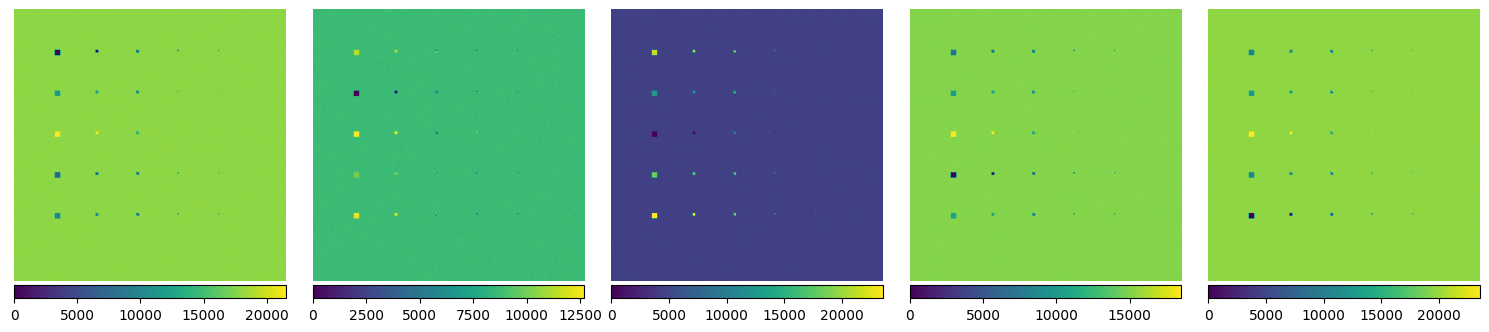

In [4]:
# Euclidean Distance (ED) calculation
def ED(HSI, d):
    x, y, L = HSI.shape
    N = x * y
    r = HSI.reshape((N, L)).T
    results = np.sqrt(np.sum((r - d[:, None]) ** 2, axis=0))
    return results.reshape(x, y)

# Compute ED with 5 targets and TE2 hyperspectral image
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(5):
    d = M[:, idx]
    resultED = ED(hsi, d)
    im = axs[idx].imshow(resultED, cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)

plt.tight_layout()
plt.show()

## 5. Spectral Angle Mapper (SAM)

Spectral Angle Mapper (SAM) is an angular-based similarity measure between the spectra, where the angle between the spectral vectors is computed. Smaller angles indicate higher similarity.

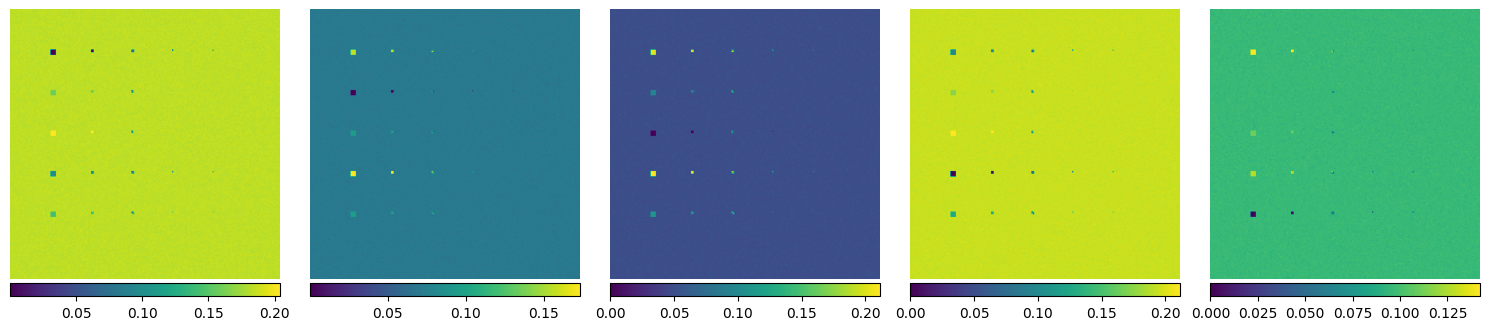

In [5]:
# Spectral Angle Mapper (SAM) calculation
def SAM(HSI, d):
    x, y, L = HSI.shape
    N = x * y
    r = HSI.reshape((N, L))
    r = r / np.linalg.norm(r, axis=1, keepdims=True)
    d = d / np.linalg.norm(d)
    results = np.dot(r, d)
    results = np.clip(results, -1, 1)  # Avoiding numerical issues
    results = np.arccos(results)
    return results.reshape(x, y)

# Compute SAM with 5 targets and TE2 hyperspectral image
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(5):
    d = M[:, idx]
    resultSAM = SAM(hsi, d)
    im = axs[idx].imshow(resultSAM, cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)

plt.tight_layout()
plt.show()

## 6. Spectral Information Divergence (SID)

SID measures the divergence between two probability distributions of spectral signatures. It’s based on the information-theoretic concept and detects differences in spectral signatures’ information content.

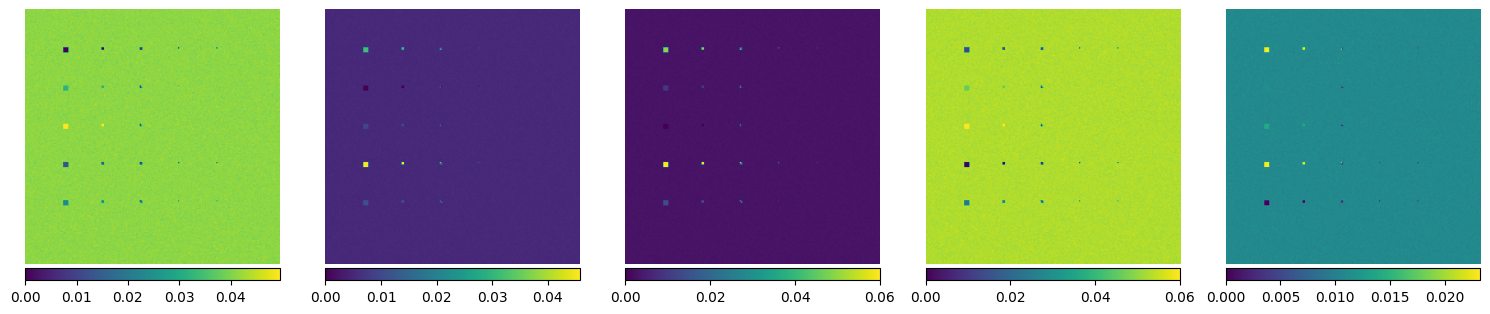

In [6]:

# Spectral Information Divergence (SID) calculation
def SID(HSI, d):
    eps = 1e-6
    x, y, L = HSI.shape
    N = x * y
    r = HSI.reshape((N, L))
    r[r <= 0] = eps
    d[d <= 0] = eps
    r = r / np.sum(r, axis=1, keepdims=True)
    d = d / np.sum(d)
    d_repeated = np.tile(d, (N, 1))
    results = np.sum(d_repeated * np.log(d_repeated / r), axis=1) + np.sum(r * np.log(r / d_repeated), axis=1)
    return results.reshape(x, y)

# Compute SID with 5 targets and TE2 hyperspectral image
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(5):
    d = M[:, idx]
    resultSID = SID(hsi, d)
    im = axs[idx].imshow(resultSID, cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)

plt.tight_layout()
plt.show()

## 7. Spectral Information Divergence-Spectral Angle Mapper (SID-SAM)

This section combines the SID and SAM measures by multiplying the SID values with the tangent of the SAM angle.

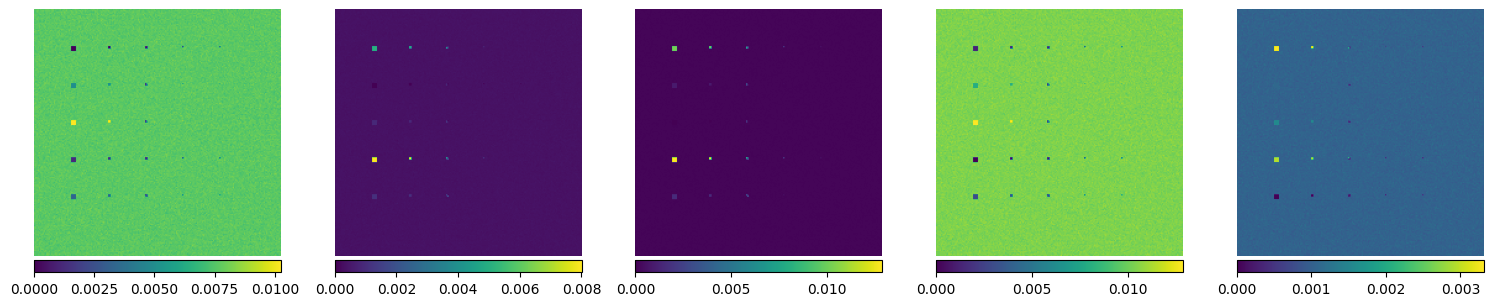

In [7]:
# SID-SAM combined calculation
def SID_SAM(HSI, d):
    return SID(HSI, d) * np.tan(SAM(HSI, d))

# Compute SAM-SID with 5 targets and TE2 hyperspectral image
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(5):
    d = M[:, idx]
    resultSAMSID = SID_SAM(hsi, d)
    im = axs[idx].imshow(resultSAMSID, cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)

plt.tight_layout()
plt.show()